# Introduction and Motivation
We will use data of about 100,000 unique seismograms compiled from the IRIS database in order to plot the global seismic wavefield. This diagram contain detailed information about the structure of Earth's interior. From this diagram, we will estimate the radius of Earth's core.

### Here we are importing relevant python packages

To run a box you can click the "play" triangle button above or simply do "Shift + Enter"

In [25]:
import numpy as np
import matplotlib.pyplot as plt

### In the following two cells, we initialize the data arrays and then read in all of the data files containing the individual seismograms. 

In [26]:
## Initialize data arrays
NTraces=[];
NRejected=[];
z=[];
dist=[];
 

In [27]:
for i in  range(1,361): ## for loop to read the files
    file="GlobalStacks.BHZ.1.sec.dist." + str(i) ##name of each file
    
#    path="/home/rnw16101/Jupyter_notebooks/GlobalStacksFiles_BHZ_1_sec/"+file ## file destination 
    path="/home/cab16109/Project Files/GlobalStacksFiles_BHZ_1_sec/"+file
    
    dist.append(i);
    iris = np.genfromtxt(path,delimiter=None)
    STA=iris[0,2];
    NTraces.append(iris[0,2]);
    NRejected.append(iris[0,3]);
    
    length=len(iris);
    time=[];
    StackRaw=[];
    StackRawN2=[];
    StackSTALTA=[];
    StackSTALTAN2=[];
    StackEnvelope=[];
    
    for j in range(0,length):
        time.append(iris[j,0]);
        StackRaw.append(iris[j,4]);
        StackRawN2.append(iris[j,5]);
        StackSTALTA.append(iris[j,6]);
        StackSTALTAN2.append(iris[j,7]);
        StackEnvelope.append(iris[j,8]);
        
    ThingToPlot=np.sqrt(abs(StackSTALTAN2-np.mean(StackSTALTAN2)));
    #ThingToPlot=np.sqrt(StackEnvelope);
    z.append(ThingToPlot);
    

x=np.divide(dist,2);

y=np.divide(time,60);

X,Y=np.meshgrid(x,y);

Z = np.zeros_like(X,dtype=float);

### The following cell turns these arrays into a 2 D data mesh for plotting

In [28]:
## creating the 2D data mesh
for kk in range(0,len(x)-1):
    for jj in range(0,len(y)-1):
        Z[jj][kk]=z[kk][jj]
Z_max=Z.max();
Z_min=Z.min();

### And finally, this cell plots the stacked seismograms, creating a view of our global seismic wavefield.

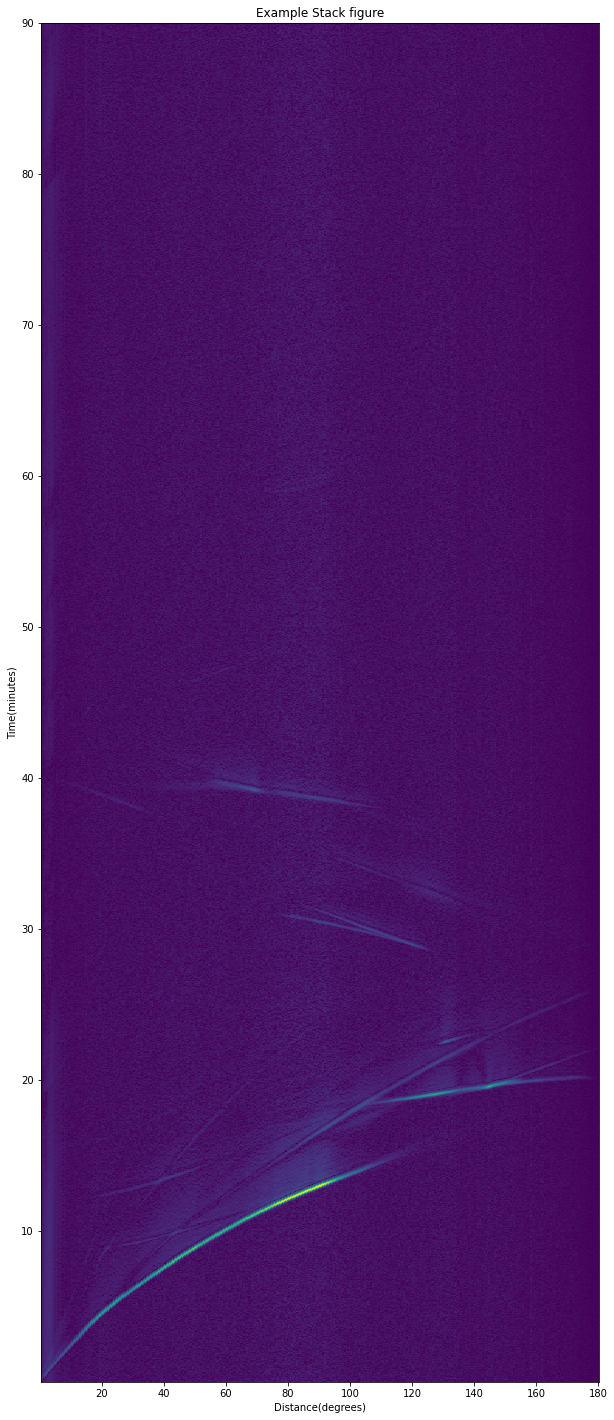

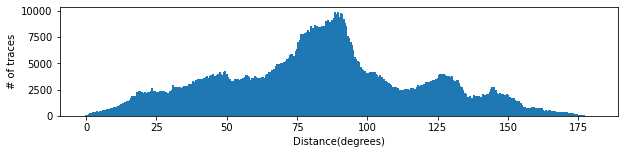

In [29]:
##plot
plt.figure(figsize=(10,25))
plt.pcolormesh(x,y,Z,shading='auto')
plt.title('Example Stack figure')
plt.xlabel('Distance(degrees)')
plt.ylabel('Time(minutes)')

plt.figure(figsize=(10,2))
hh=np.arange(start=0, stop=max(dist)/2, step=0.5)
plt.xlabel('Distance(degrees)')
plt.ylabel('# of traces')
plt.bar(hh,NTraces)
plt.show()


## Using the global seismic wavefield diagram we have created, we can estimate the radius of Earth's core!

We will use very simplistic geometric assumptions, and ignore complications due to wave refraction and the curvature of the Earth to make this measurement. You will need to know that the radius of the Earth is about 6371 km. 

I recommend that you work in groups of 2-3, discuss questions amongst yourselves and with Prof. Battersby, and draw some diagrams to come up with a way to measure the Earth's radius.

### Basic math examples! (you can skip if you're already familiar)

In [30]:
# You will use some basic math, so here are some basic math examples in python:
#we can add
12.0+3.0

15.0

In [31]:
#multiply
12.0*3.0

36.0

In [32]:
#powers, you use two astriks **
12.0**(3.0)

1728.0

In [33]:
#all together
((12.0+3.0)*3.0)**3.0

91125.0

In [34]:
# how about algebra
x=7.0
y=4.0
x+y

11.0

In [35]:
#trig functions. Sine 'np.sin()', cosine 'np.cos()', tangent 'np.tan()' and inverse functions 'np.arcsin()', 'np.arccos()', 
np.sin(np.pi/4)

0.7071067811865475

In [36]:
#be careful though, python assumes your angles are in radians, to get something degrees you have to multiply by 180.0/np.pi
np.arcsin(0.707)*180/np.pi

44.991348337162016

In [37]:
#A couple of points, there are different types of data in python

0.1 
# anything with a decimal point in it is a "float" and this is what you want to use for 
#"real" data or if you want to calcuate something.

0.1

In [38]:
44 #any number that DOES NOT have a decimal number, is an intiger. Use this for counting

44

In [39]:
'things between quotes are called strings' #this is for anything that is text like

'things between quotes are called strings'

In [40]:
# We can also assign any type of data to variables and do math on them, even strings! 
# We use the = to define a variable. for instance

w = "awe"
s = "so"
u = "me"

w+s+u

'awesome'

In [41]:
#last likely we can make lists of things using brackets and set them to a variable

x = np.array([0.0,1.0,2.0,3.0])
y = np.array([1.0,3.0,4.0,5.0])

In [42]:
print(x)
print(y)

[0. 1. 2. 3.]
[1. 3. 4. 5.]


In [43]:
np.mean(x)

1.5

In [44]:
np.std(x)

1.118033988749895

In [45]:
# Print values with formatting:
print('Mean:{:.1f}, Median:{:.1f}, Std Dev:{:.1f}'.format(np.mean(x), np.median(x), np.std(x)))


Mean:1.5, Median:1.5, Std Dev:1.1


## And some cells for you to do your computation in!

## Your answer, the radius of Earth's core is approximately: _____ km